<a href="https://colab.research.google.com/github/DrFrank25/Syndecan_4-Ag73/blob/main/HBonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Script Hydrogen Bonds (H-bonds) plot**

In [ ]:
# --- Import libraries ---
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd

In [ ]:
# ===== Settings =====
COLORS = ['#1f77b4', '#ff7f0e', '#2ca02c']
FIGSIZE = (11, 6)
DPI = 1200
LEGEND_NAMES = ["Run 1", "Run 2", "Run 3"]

In [ ]:
# ===== File upload =====
uploaded = files.upload()
if not uploaded:
    raise SystemExit("No file uploaded. Please upload .xvg files.")


Saving hbnum_Run1.xvg to hbnum_Run1.xvg
Saving hbnum_Run2.xvg to hbnum_Run2.xvg
Saving hbnum_Run3.xvg to hbnum_Run3.xvg


In [ ]:
# ===== Function to read .xvg data =====
def read_xvg_from_bytes(content_bytes, encoding='utf-8'):
    s = content_bytes.decode(encoding, errors='replace')
    times, vals = [], []
    for line in s.splitlines():
        line = line.strip()
        if not line or line.startswith(('#', '@')):
            continue
        parts = line.split()
        if len(parts) >= 2:
            try:
                times.append(float(parts[0]))
                vals.append(float(parts[1]))
            except ValueError:
                continue
    return np.array(times), np.array(vals)

plt.figure(figsize=FIGSIZE)


<Figure size 1100x600 with 0 Axes>

<Figure size 1100x600 with 0 Axes>

Run 1:
  Mean: 2.03 H-bonds
  Standard deviation: 1.09 H-bonds

Run 2:
  Mean: 1.43 H-bonds
  Standard deviation: 1.07 H-bonds

Run 3:
  Mean: 1.81 H-bonds
  Standard deviation: 1.23 H-bonds



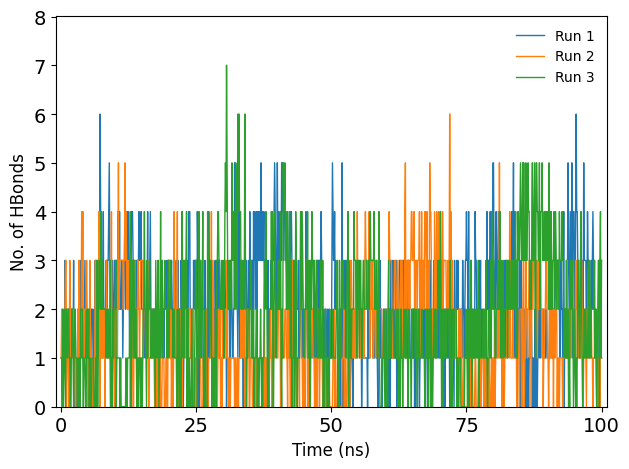

In [ ]:
# Loop over uploaded files
for i, (name, content) in enumerate(uploaded.items()):
    time, hbonds = read_xvg_from_bytes(content)

    if time.size < 2 or hbonds.size < 2:
        print(f"Warning: '{name}' contains insufficient data. Skipping.")
        continue

    # Sort by time
    order = np.argsort(time)
    time = time[order]
    hbonds = hbonds[order]

    # Mask valid data
    mask_valid = np.isfinite(time) & np.isfinite(hbonds) & (time >= 0) & (hbonds >= 0)
    time_masked = time[mask_valid]
    hbonds_masked = hbonds[mask_valid]

    if time_masked.size < 2:
        print(f"Warning: '{name}' contains no valid data after masking. Skipping.")
        continue

    # Statistics
    mean_val = np.nanmean(hbonds_masked)
    std_val = np.nanstd(hbonds_masked)

    color = COLORS[i % len(COLORS)]
    curve_name = LEGEND_NAMES[i] if i < len(LEGEND_NAMES) else f"Run {i+1}"

    # Raw curve
    plt.plot(time_masked, hbonds_masked,
             linewidth=1.0, label=f"{curve_name}", color=color)

    print(f"{curve_name}:")
    print(f"  Mean: {mean_val:.2f} H-bonds")
    print(f"  Standard deviation: {std_val:.2f} H-bonds\n")

    # Axes configuration
    plt.xlabel("Time (ns)", fontsize=12)
    plt.ylabel("No. of HBonds", fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=14)

    # Tick range
    plt.xlim(-1, 101)  # X-axis limits
    plt.ylim(0.1, 8.01)  # Y-axis limits
    plt.xticks(np.arange(0, 101, 25))     # from 0 to 100, step 25
    plt.yticks(np.arange(0.0, 8.1, 1.0))  # from 0 to 8.0, step 1.0

# Custom legend
plt.legend(
    loc='upper right',
    fontsize=10,
    frameon=True,
    facecolor='white',
    edgecolor='white',
    fancybox=False,
    shadow=False
)

plt.grid(False)
plt.tight_layout()

# --- save and render the figure (at the end of the script, BEFORE plt.show()) ---
fig = plt.gcf()  # get the current figure (the one just plotted)
fig.tight_layout()
fig.canvas.draw()  # force rendering in Colab
plt.show()

In [ ]:
# --- Save and download the figure ---
fig = plt.gcf()  # get current figure
fig.tight_layout()
fig.canvas.draw()

fig.savefig(
    "HBonds.png",
    dpi=1200,
    bbox_inches='tight',
    transparent=False
)

files.download("HBonds.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>